In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
%matplotlib inline

## Import data

### Global results

In [2]:
df = pd.read_csv('globalResults.csv', sep='\t')
df.head()

,Image name,Region name,Region area,DAPI bg int mean,DAPI bg int sd,Cy5 bg int mean,Cy5 bg int sd,Cy3 bg int mean,Cy3 bg int sd,Nb DAPI+,Nb DAPI+ Cy5+,Nb DAPI+ Cy3+,Nb DAPI+ Cy5- Cy3-,Nb DAPI+ Cy5+ Cy3-,Nb DAPI+ Cy5- Cy3+,Nb DAPI+ Cy5+ Cy3+
0,young_mouse1_slice1,root_grey_CB_CBN_VeCB,85248.531,625.602,564.428,1973.946,562.901,1377.558,339.723,163,14,8,147,8,2,6
1,young_mouse1_slice1,root_grey_CB_CBN_IP,234253.803,861.497,1056.826,1859.530,633.676,1202.510,364.011,421,31,34,371,16,19,15
2,young_mouse1_slice1,root_grey_CB_CBN_FN,108358.117,838.379,693.392,2102.140,319.459,1591.258,224.956,281,21,22,248,11,12,10
3,young_mouse1_slice1,root_grey_CB_CBX_HEM_PRM,358599.213,3746.387,3616.354,2170.004,874.730,1050.267,259.417,106,14,2,90,14,2,0
4,young_mouse1_slice1,root_grey_CB_CBX_HEM_COPY,483530.680,2361.277,2916.972,1965.179,783.999,1075.315,320.115,208,37,0,171,37,0,0


In [3]:
print('Nb images: ' + str(df['Image name'].nunique()))
print('Nb regions: ' + str(len(df)))
print('Nb unique regions: ' + str(df['Region name'].nunique()))

Nb images: 2
Nb regions: 405
Nb unique regions: 207


Text(0, 0.5, 'Image')

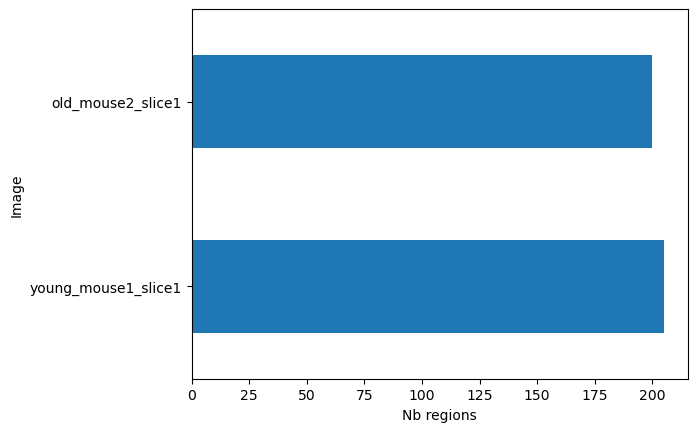

In [4]:
ax = df['Image name'].value_counts().plot(kind='barh')
ax.set_xlabel("Nb regions")
ax.set_ylabel("Image")

Text(0, 0.5, 'Region')

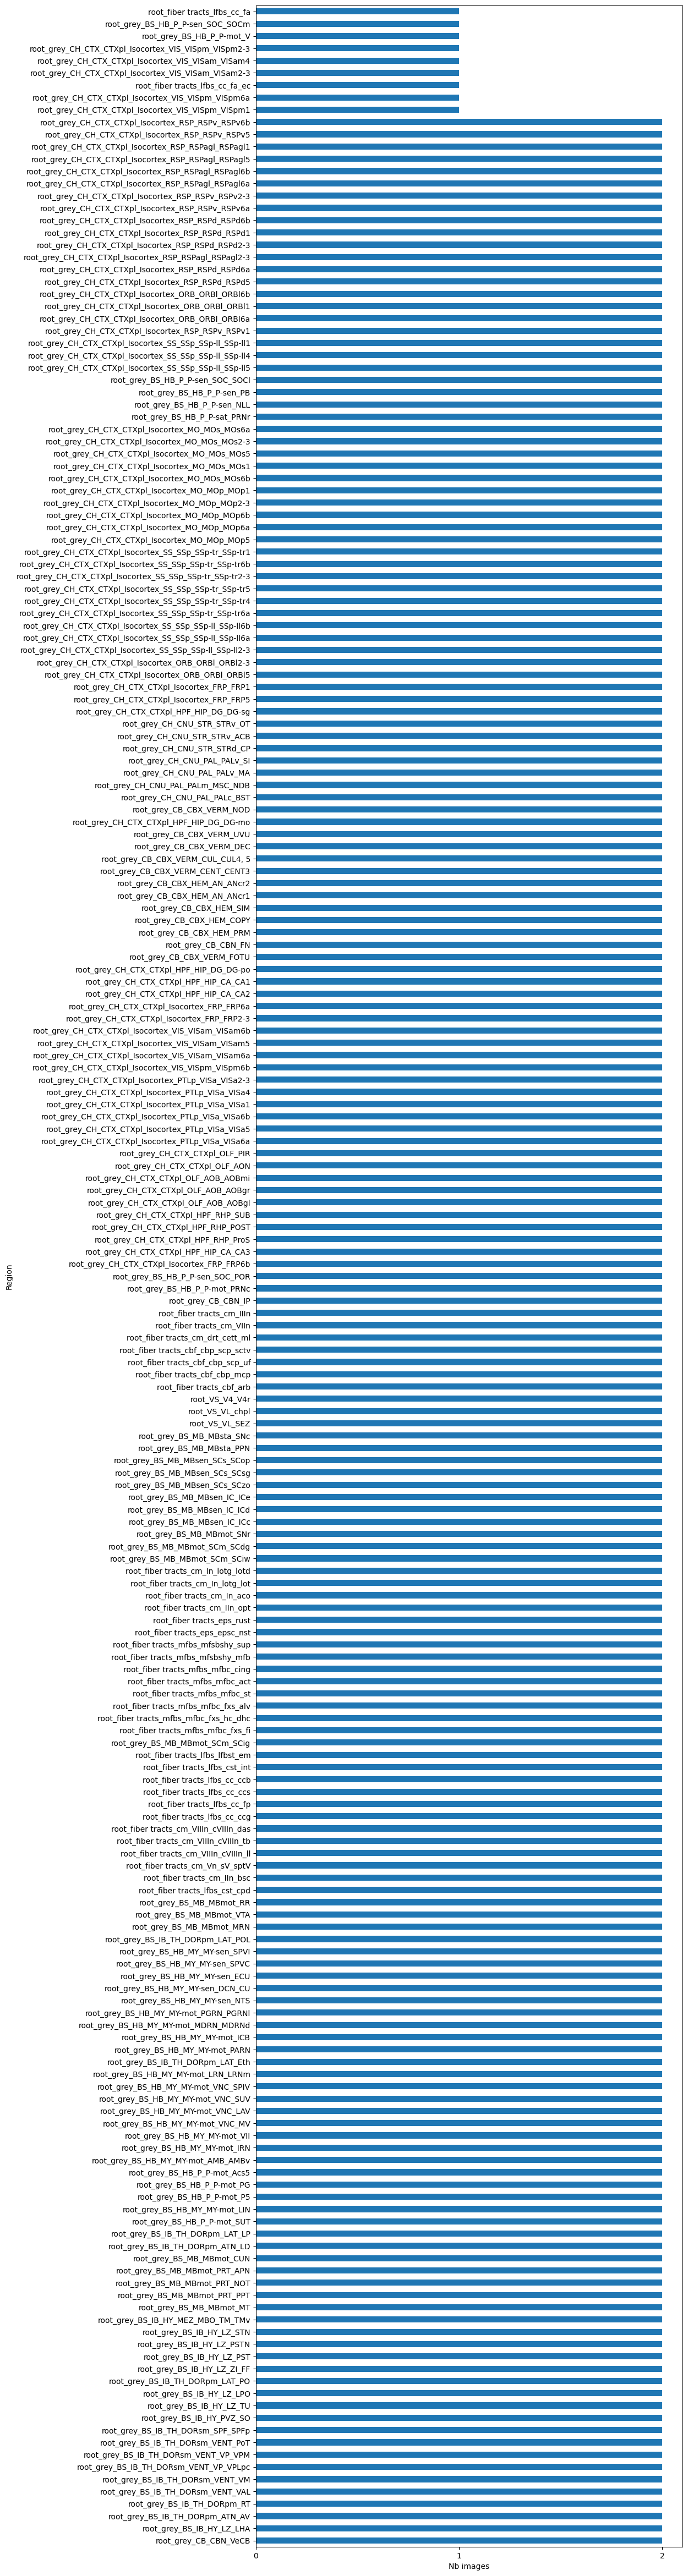

In [5]:
ax = df['Region name'].value_counts().plot(kind='barh', xticks=np.arange(0, 3, 1), figsize=(10,60))
ax.set_xlabel("Nb images")
ax.set_ylabel("Region")

### Cells results

In [6]:
dfCell = pd.read_csv('cellsResults.csv', sep='\t')
dfCell.head()

,Image name,Region name,Nuc area,Nuc circularity,Nuc DAPI int mean,Nuc DAPI int sd,Nuc Cy5 int mean,Nuc Cy5 int sd,Nuc Cy3 int mean,Nuc Cy3 int sd,...,Cy5 int mean,Cy5 int sd,is Cy3?,Cy3 area,Cy3 int mean,Cy3 int sd,Cyto Cy5 area,Cyto Cy5 int mean,Cyto Cy3 area,Cyto Cy3 int mean
0,young_mouse1_slice1,root_grey_CB_CBN_VeCB,31.073,0.954,4337.999,2423.678,89.454,317.201,100.409,180.445,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,young_mouse1_slice1,root_grey_CB_CBN_VeCB,27.773,0.970,3947.795,1946.660,-220.009,253.578,-83.711,118.103,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,young_mouse1_slice1,root_grey_CB_CBN_VeCB,156.251,0.972,1662.253,948.945,-405.077,298.835,-171.691,122.299,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,young_mouse1_slice1,root_grey_CB_CBN_VeCB,157.620,0.950,1210.198,848.300,-430.512,787.540,-433.704,266.674,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,young_mouse1_slice1,root_grey_CB_CBN_VeCB,151.765,0.981,1438.637,1005.081,259.527,303.709,171.417,189.041,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print('Nb images: ' + str(dfCell['Image name'].nunique()))
print('Nb regions: ' + str(dfCell.groupby(['Image name', 'Region name']).ngroups))
print('Nb unique regions: ' + str(dfCell['Region name'].nunique()))
print('Nb cells: ' + str(dfCell.shape[0]))

Nb images: 2
Nb regions: 396
Nb unique regions: 204
Nb cells: 161753


Text(0, 0.5, 'Region')

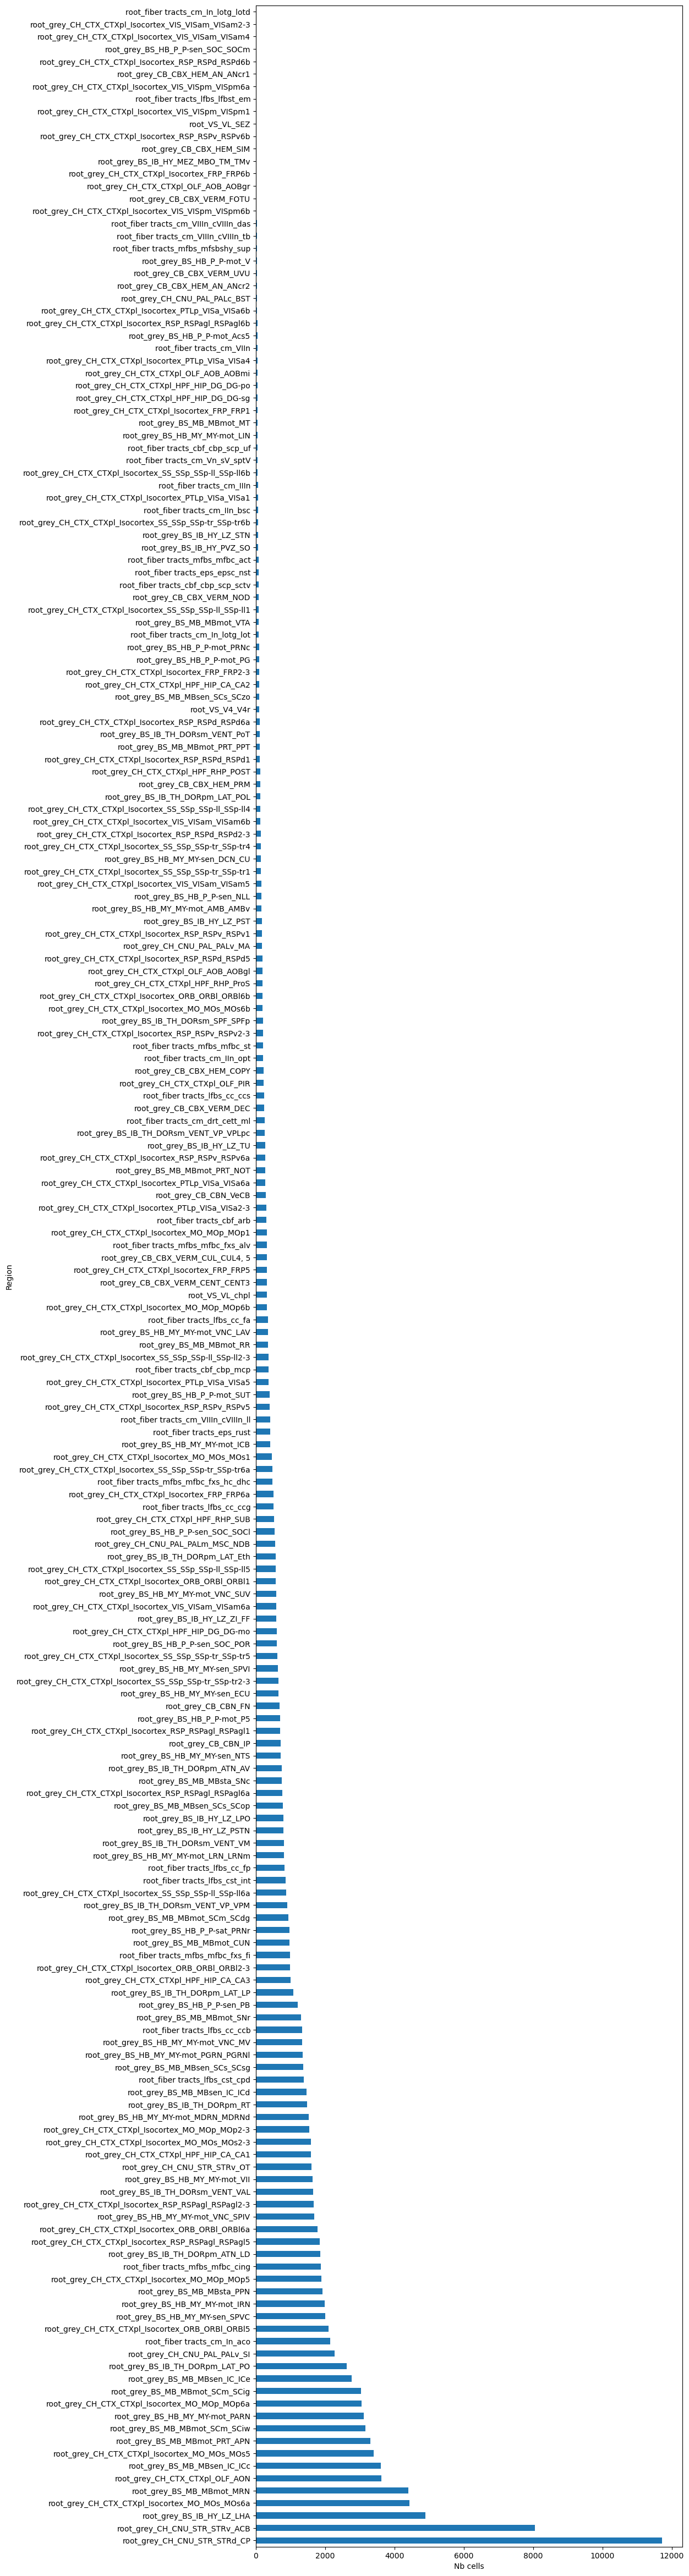

In [8]:
ax = dfCell['Region name'].value_counts().plot(kind='barh', figsize=(10,60))
ax.set_xlabel("Nb cells")
ax.set_ylabel("Region")

## Select region

In [9]:
regionName = 'root_grey_BS_IB_TH'

In [10]:
dfReg = df[df['Region name'].str.contains(regionName)]
dfReg.head()

,Image name,Region name,Region area,DAPI bg int mean,DAPI bg int sd,Cy5 bg int mean,Cy5 bg int sd,Cy3 bg int mean,Cy3 bg int sd,Nb DAPI+,Nb DAPI+ Cy5+,Nb DAPI+ Cy3+,Nb DAPI+ Cy5- Cy3-,Nb DAPI+ Cy5+ Cy3-,Nb DAPI+ Cy5- Cy3+,Nb DAPI+ Cy5+ Cy3+
126,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_LAT_POL,35930.454,545.143,586.774,1650.297,507.790,1163.753,292.817,79,11,6,67,6,1,5
127,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_LAT_Eth,161109.706,406.112,408.523,1649.199,399.853,1168.369,261.100,309,94,97,194,18,21,76
128,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_LAT_LP,275983.150,573.564,690.060,1699.641,476.427,1213.097,310.626,642,196,136,415,91,31,105
129,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_LAT_PO,775875.005,417.877,423.840,1711.879,463.113,1302.859,337.831,1497,484,433,934,130,79,354
130,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_ATN_LD,496034.306,498.920,576.501,1738.926,421.783,1124.860,229.226,1119,360,351,701,67,58,293


In [11]:
print('Nb images: ' + str(dfReg['Image name'].nunique()))
print('Nb regions: ' + str(len(dfReg)))
print('Nb unique regions: ' + str(dfReg['Region name'].nunique()))

Nb images: 2
Nb regions: 26
Nb unique regions: 13


In [12]:
dfCellReg = dfCell[dfCell['Region name'].str.contains(regionName)]
dfCellReg.head()

,Image name,Region name,Nuc area,Nuc circularity,Nuc DAPI int mean,Nuc DAPI int sd,Nuc Cy5 int mean,Nuc Cy5 int sd,Nuc Cy3 int mean,Nuc Cy3 int sd,...,Cy5 int mean,Cy5 int sd,is Cy3?,Cy3 area,Cy3 int mean,Cy3 int sd,Cyto Cy5 area,Cyto Cy5 int mean,Cyto Cy3 area,Cyto Cy3 int mean
53591,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_LAT_POL,37.589,0.950,4073.769,2223.526,97.656,187.619,265.058,142.718,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53592,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_LAT_POL,134.122,0.968,2669.879,1472.899,-170.537,424.997,-93.176,218.271,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53593,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_LAT_POL,36.799,0.951,2711.206,1420.192,565.059,369.369,285.302,152.658,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53594,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_LAT_POL,167.609,0.938,1082.952,732.342,260.128,396.836,160.266,181.899,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53595,young_mouse1_slice1,root_grey_BS_IB_TH_DORpm_LAT_POL,32.163,0.927,3561.888,1367.683,-92.677,171.758,67.642,138.912,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print('Nb images: ' + str(dfCellReg['Image name'].nunique()))
print('Nb regions: ' + str(dfCellReg.groupby(['Image name', 'Region name']).ngroups))
print('Nb unique regions: ' + str(dfCellReg['Region name'].nunique()))
print('Nb cells: ' + str(dfCellReg.shape[0]))

Nb images: 2
Nb regions: 26
Nb unique regions: 13
Nb cells: 12405


Region name
root_grey_BS_IB_TH_DORpm_ATN_AV            740
root_grey_BS_IB_TH_DORpm_ATN_LD           1862
root_grey_BS_IB_TH_DORpm_LAT_Eth           565
root_grey_BS_IB_TH_DORpm_LAT_LP           1083
root_grey_BS_IB_TH_DORpm_LAT_PO           2619
root_grey_BS_IB_TH_DORpm_LAT_POL           123
root_grey_BS_IB_TH_DORpm_RT               1479
root_grey_BS_IB_TH_DORsm_SPF_SPFp          200
root_grey_BS_IB_TH_DORsm_VENT_PoT          114
root_grey_BS_IB_TH_DORsm_VENT_VAL         1656
root_grey_BS_IB_TH_DORsm_VENT_VM           807
root_grey_BS_IB_TH_DORsm_VENT_VP_VPLpc     250
root_grey_BS_IB_TH_DORsm_VENT_VP_VPM       907
dtype: int64


Text(0, 0.5, 'Region')

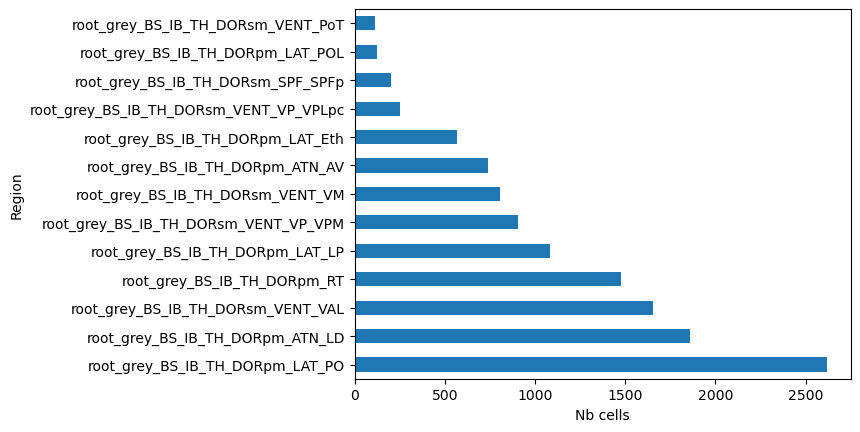

In [14]:
print(dfCellReg.groupby('Region name').size())

ax = dfCellReg['Region name'].value_counts().plot(kind='barh')
ax.set_xlabel("Nb cells")
ax.set_ylabel("Region")

## Analyze region

### Cells identity

In [15]:
for name, group in dfReg.groupby('Image name'):
    print('\n'+name)
    print("Neurons expressing ORF1p: {:.2%}".format(group["Nb DAPI+ Cy5+ Cy3+"].sum()/group["Nb DAPI+ Cy5+"].sum()))
    print("ORF1p cells being neuronal: {:.2%}".format(group["Nb DAPI+ Cy5+ Cy3+"].sum()/group["Nb DAPI+ Cy3+"].sum()))


old_mouse2_slice1
Neurons expressing ORF1p: 90.00%
ORF1p cells being neuronal: 67.19%

young_mouse1_slice1
Neurons expressing ORF1p: 70.95%
ORF1p cells being neuronal: 78.80%


### Cells intensity

In [16]:
dfCellNeunOrf1p = dfCellReg[(dfCellReg['is Cy5?']==True) & (dfCellReg['is Cy3?'] == True)]
print('Nb cells: ' + str(dfCellNeunOrf1p.shape[0]))

Nb cells: 2470


Text(0, 0.5, 'ORF1p mean intensity per cell')

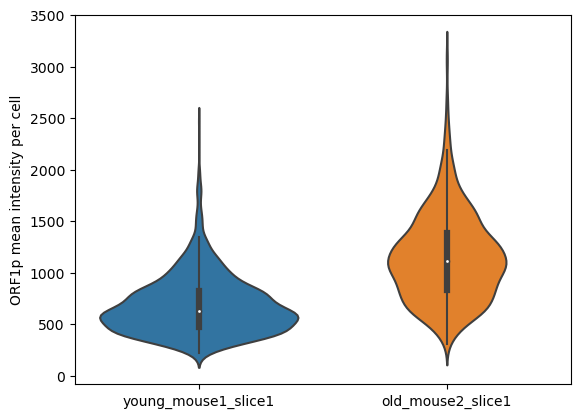

In [17]:
ax = sb.violinplot(dfCellNeunOrf1p, x='Image name', y='Cy3 int mean')
ax.set_xlabel("")
ax.set_ylabel("ORF1p mean intensity per cell")

Text(0.5, 0, 'Cell ORF1p mean intensity')

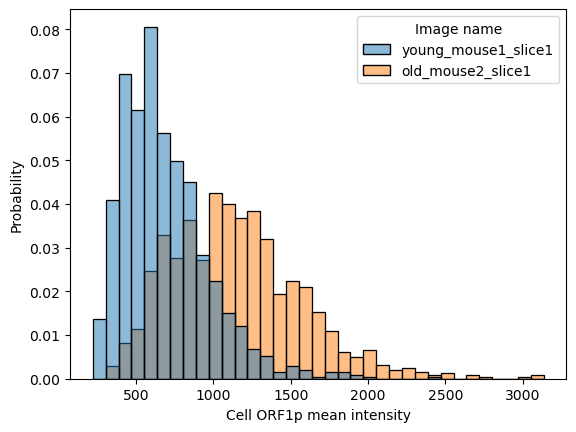

In [18]:
ax = sb.histplot(dfCellNeunOrf1p, x='Cy3 int mean', hue='Image name', stat='probability')
ax.set_xlabel("Cell ORF1p mean intensity")